# Módulo: Inferencia Estadística
## T8: Distribuciones muestrales y teorema del límite central


# Objetivos de la clase
- Comprender el concepto de distribución muestral
- Conocer y aplicar el teorema del límite central para comparar la media muestral con la media poblacional.
- Conocer y aplicar la distribución muestral de la varianza.


# Introducción


## Motivación
En una planta industrial se fabrican bolas de molienda forjadas. El proceso de fabricación está automatizado de tal forma que nominalmente las bolas tienen una dureza promedio de **62 HRC**.

<center>
    <img src="figures/bolas-1.png" width="600"/>
</center>

El departamento de control de calidad selecciona aleatoriamente 5 bolas y obtienen que en promedio tienen una dureza de **64 HRC**.



Se contrata a tres empresas externas para realizar la misma evaluación y se obtienen los siguientes promedios de dureza: **63 HRC**, **62 HRC** y **60 HRC**

<center>
    <img src="figures/bolas-2.png" width="700"/>
</center>

¿El proceso de fabricación requiere de ajustes o estos promedios obtenidos desde las muestras están dentro de rangos normales?

## Definiciones
<br>

<dl>
<dt>Población</dt>
<dd>Consiste en la totalidad de observaciones en las que estamos interesados.</dd>
<dd>Cada observación es un valor de una variable aleatoria $X$ con alguna distribución de probabilidad $f(x)$</dd>
<dt>Muestra</dt>
<dd>Es un subconjunto de la población que se selecciona de ella para estudiarla. </dd>
<dt>Inferencia estadística</dt>
<dd>Busca caracterizar una población a través de analizar una o varias muestras. </dd>
<dt>Muestreo</dt>
<dd>Procedimiento mediante el cual se selecciona una muestra de la población.</dd>
</dl>

## Muestreo 

Las inferencias sobre la población serán válidas solo si las muestras son **representativas** de ella.

Un muestreo que sobreestime o subestime consistentemente alguna característica de la población estará **sesgado**

Para reducir la posibilidad de sesgo, es deseable elegir una **muestra aleatoria** (o estratificada).

<center>
    <img src="figures/random-samp-1.jpg" width="400"/>
</center>



Para las bolas de molienda se obtuvieron las siguientes muestras para estudiar las durezas HRC:

<center>
    <img src="figures/tbolas-1.png" width="600"/>
</center>

Las durezas HRC para cada bola seleccionada son variables aleatorias en sí. 

Debido al **muestreo independiente y al azar**, cada variable será independiente y tendrá la misma distribución de probabilidad $f(x)$


# Distribuciones muestrales

Distribución muestral: es la distribución de probabilidad de un estadístico (media, varianza, etc.)

<center>
    <img src="figures/tbolas-2.png" width="600"/>
</center>

La distribución muestral dependerá de:
- Distribución de probabilidad de la población $f(x)$
- Tamaño $n$ de las muestras
- Método de selección de las muestras

Las distribuciones muestrales de $\overline{X}$ y $S^2$ (media y varianza de la muestra) sirven como mecanismos para hacer inferencias respecto de $\mu$ y $\sigma^{2}$ (media y varianza de la población)

<center>
    <img src="figures/sample-popu-4.png" width="900"/>
</center>

Las distribuciones muestrales sirven para analizar si las medias y/o varianzas obtenidas de una muestra tienen una discrepancia "típica" con los valores reales de la población.

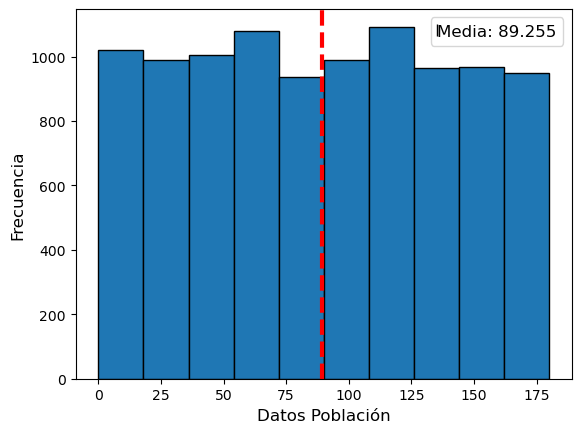

In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8)
N = 10000 #tamano de la poblacion
population = np.random.random_sample(N)*180 #genera datos
#population = np.random.normal(0.5, 0.1, N)*100 #genera datos
plt.hist(population, edgecolor='black', label='Media: {:.3f}'.format(population.mean()))
plt.xlabel('Datos Población', fontsize=12), plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(population.mean(), color='red', linestyle='dashed', linewidth=3)
plt.legend(handlelength=0., handletextpad=0., fontsize=12)
plt.show()

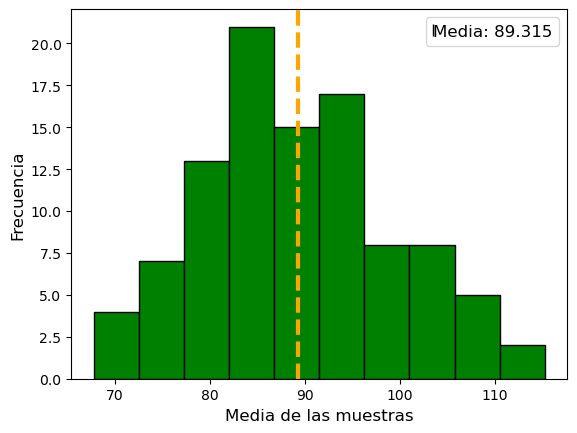

In [14]:
n = 30 #tamano de muestra
s = 100 #cantidad de muestras

means = np.array([np.mean(population[np.random.randint(low=0, high=N, size=n)]) for i in range(s)])
plt.hist(means, edgecolor='black', color='green', label='Media: {:.3f}'.format(means.mean()))
plt.xlabel('Media de las muestras', fontsize=12), plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(means.mean(), color='orange', linestyle='dashed', linewidth=3)
plt.legend(handlelength=0, handletextpad=0, fontsize=12)
plt.show()

# Distribución muestral de la media

## Teorema del límite central

Sea $\overline{X}$ la media de una muestra aleatoria de tamaño $n$ tomada de una población con media $\mu$ y varianza $\sigma^2$. Entonces a medida que $n \rightarrow \infty$, la distribución de:

<div class="well">
\begin{align}
    Z = \frac{ \overline{X} - \mu }{ \sigma / \sqrt{n} }
\end{align}
</div>

es la distribución normal estándar $n(z; 0, 1)$

Esto se cumple independiente de la distribución de la población.

**Equivalentemente:** 

Sea $\overline{X}$ la media de una muestra aleatoria de tamaño $n$ tomada de una población con media $\mu$ y varianza $\sigma^2$. Entonces a medida que $n \rightarrow \infty$, se cumple que:

- La distribución muestral de $\overline{X}$ tiene media $\mu$ 
- La varianza muestral de $\overline{X}$ es $\sigma^2 / \sqrt{n}$
- La distribución muestral de $\overline{X}$ es normal



**Observaciones**

✅ En general si $n \geq 30$ la distribución muestral de $\overline{X}$ será normal si la distribución de la población no es muy asimétrica.

✅ Si $n < 30$ la distribución muestral de $\overline{X}$ será normal solo si la distribución de la población es aproximadamente normal.

✅ Si la distribución de la población es normal, independiente del valor de $n$, la distribución muestral de $\overline{X}$ será normal.

## Ejemplo
Un determinado viaje en bus demora en promedio 28 minutos con una desviación estándar de 5 minutos. En cierta semana el bus hizo el recorrido 40 veces. ¿Cuál es la probabilidad que el tiempo promedio de viaje sea mayor a 30 minutos?

<center>
    <img src="figures/bus-1.png" width="300"/>
</center>

La población tiene en este caso: $\mu = 28$ y $\sigma = 5$. 

Queremos calcular $P(\overline{X} > 30 )$ para una muestra de $n=40$. 

La variable $Z$ que tomará una distribución normal estándar es:

\begin{align}
    Z = \frac{ \overline{X} - \mu }{ \sigma / \sqrt{n} } = \frac{ \overline{X} - 28 }{ 5 / \sqrt{40} }
\end{align}

El valor $z$ equivalente al valor $\overline{x}=30$ es:

\begin{align}
    Z =  \frac{ 30 - 28 }{ 5 / \sqrt{40} } = 2.53
\end{align}

Por lo tanto:

\begin{align}
    P(\overline{X} > 30 ) = P(Z > 2.53)
\end{align}

✅ Recordar que las tablas entregan los datos de la distribución normal estándar acumulada

<center>
    <img src="figures/norm-table-11.png" width="1300"/>
</center>

\begin{align}
    P(Z > 2.53) = 1 - P(Z \leq 2.53) = 1 - 0.9943 = 0.0057
\end{align}

Es decir, en la muestra de los 40 viajes hay una probabilidad de 0.0057 que el bus demore más de 30 minutos.

Si ahora el viaje se hace **100 veces**, ¿bajo qué duración promedio estará el **90% de los viajes**?

Debemos encontrar el valor $z$ tal que $P(Z<z)=0.9$. Esto ocurre para $z \approx 1.28$.

<center>
    <img src="figures/norm-table-12.png" width="1300"/>
</center>

Calculamos el valor $\overline{x}$ equivalente:

\begin{align}
    x = \frac{\sigma z}{\sqrt{n}} + \mu = \frac{5 \cdot 1.28}{\sqrt{100}} + 28 = 28.6
\end{align}

Es decir, el 90% de los 100 viajes durará menos de 28.6 minutos

# Distribución muestral de la varianza


## Teorema

Si $S^{2}$ es la varianza de una muestra aleatoria de tamaño $n$ tomada de una población normal con varianza $\sigma^{2}$, entonces la variable estadística:

\begin{align}
    \frac{(n-1) S^2}{\sigma^2}
\end{align}

tiene distribución gamma con $\alpha = \nu / 2$ y $\beta = 2$, donde $\nu$ representa los **grados de libertad**.

Este caso especial de la distribución gamma se conoce como distribución **chi cuadrada**.




Debido a esto, la variable estadística anterior se denomina chi cuadrada y es igual a:

\begin{align}
    \chi^2 = \frac{(n-1) S^2}{\sigma^2} = \sum_{i=1}^{n} \frac{ ( X_i - \overline{X} )^2 }{\sigma^2}
\end{align}

Esta variable sigue una distribución chi cuadrada con $\nu = n - 1$ grados de libertad.

<center>
    <img src="figures/chi-sq-1.png" width="400"/>
</center>

La probabilidad que una muestra aleatoria genere un valor $\chi^2$ mayor a un valor específico es igual al área $\alpha$ bajo la curva a la derecha de este valor.

<center>
    <img src="figures/chi2-1.png" width="500"/>
</center>

El valor $\chi^2$ por arriba del cual se encuentra un área (probabilidad) de $\alpha$ se representa por $\chi_{\alpha}^2$. 

Estos valores se pueden obtener desde tablas específicas.

## Ejemplo 
Una fábrica de baterías garantiza que su producto dura en promedio 3 años con una varianza de 1 año$^2$ y distribución normal. Si 5 baterías tuvieron las siguientes duraciones, ¿se cumple realmente que la varianza de la población es 1 año$^2$?
 
<center>
    <img src="figures/tbat-1.png" width="300"/>
</center>

Tenemos que $\mu = 3$ y $\sigma^2 = 1$. Para la muestra de $n=5$ queremos comparar $S^2$ con $\sigma^2$

Primero calculamos la media y varianza muestrales:

\begin{align}
    \overline{X} = \frac{1.9 + 2.4 + 3.0 + 3.5 + 4.2}{5} = 3.0
\end{align}

\begin{align}
    S^{2} = \frac{ (1.9-\overline{X})^2 + (2.4-\overline{X})^2 + (3.0-\overline{X})^2 + (3.5-\overline{X})^2 + (4.2-\overline{X})^2 }{4} = 0.815
\end{align}

Dado que $\sigma^2 = 1$, ¿es el valor de $S^2 = 0.815$ razonable? 🤨

Calculamos el valor respectivo de $\chi^2$ a partir de $S^2$:

\begin{align}
    \chi^2 = \frac{(n-1) S^2}{\sigma^2} = \frac{(5-1) 0.815}{1.0^2} = 3.26
\end{align}

Ahora estimaremos la probabilidad de obtener el valor $\chi^2 = 3.26$ para distintos rangos.

<font color=darkblue>**Algunos casos**:</font>

- *Si el 90% de los valores de $\chi^2$ estuvieran entre 1 y 4.5, ¿sería $\chi^2 = 3.26$ un valor razonable?*
- *Si el 90% de los valores de $\chi^2$ estuvieran entre 3.5 y 8, ¿sería $\chi^2 = 3.26$ un valor razonable?*





Las tablas de la distribución chi cuadrada expresan con qué probabilidad $\alpha$ ocurren valores de $\chi^2$ mayores que determinados valores $\chi^2_{\alpha}$ para distintos grados de libertad $\nu$.

Para $\nu = 5-1 = 4$:

<center>
    <img src="figures/chi2-nu4-2.png" width="1500"/>
</center>

<font color=darkblue>**Algunos casos**:</font>
 
\begin{align}
    P(\chi^2 > 0.297) & = 0.99 &
    P(\chi^2 > 1.064) & = 0.90 &
    P(\chi^2 > 7.779) & = 0.10 &
\end{align}


Se propone estimar el rango de $\chi^2$ en que ocurre el 90% de los valores de $\chi^2$

<center>
    <img src="figures/chisq-ex-2.png" width="400"/>
</center>

Entonces debemos determinar $\chi^2_{0.95}$ y $\chi^2_{0.05}$:

<center>
    <img src="figures/chi-sq-2.png" width="1200"/>
</center>

Es decir, con un 90% de probabilidad los valores de $\chi^2$ están entre 0.711 y 9.488

<div class="well">
\begin{align}
    P(0.711 < \chi^2 < 9.488) = P(\chi^2 > 0.711) - P(\chi^2 > 9.488) = 0.95 - 0.05 = 0.9
\end{align}
</div>


<br><br>
¿Entonces es un valor de $\chi^2 = 3.26$ razonable?


✅ La varianza de la muestra de 5 baterías con $S^2 = 0.815$ **sí es razonable** para un proceso que debe cumplir con que $\sigma^2 = 1.0$

# Distribución $t$

## Motivación
El teorema del límite central aplica en casos que se conoce la media $\mu$ y varianza $\sigma^2$ de la población.

Si la varianza $\sigma^2$ no es conocida, se puede aproximar mediante la varianza de la muestra $S^2$

En este caso, se reemplaza:

<div class="well">
\begin{align}
    \frac{ \overline{X} - \mu }{ \sigma / \sqrt{n} } \rightarrow \frac{ \overline{X} - \mu }{ S / \sqrt{n} }
\end{align}
</div>

Este valor sigue una distribución aproximadamente normal solo para valores $n$ grandes.

## Teorema
Para una población normal con media $\mu$ y desviación estándar no conocida, el estadístico

<div class="well">
\begin{align}
    T = \frac{ \overline{X} - \mu }{ S / \sqrt{n} }
\end{align}
</div>

tendrá una distribución $t$ con $\nu = n - 1$ grados de libertad que es simétrica alrededor de 0.

## Ejemplo
Una población normal tiene media de 20. ¿Qué tan probable es obtener una muestra de tamaño 9 con media de 24 y desviación estándar de 4.1?

\begin{align}
    t = \frac{ \overline{x} - \mu }{ S / \sqrt{n} } = \frac{ 24 - 20 }{ 4.1 / \sqrt{9} } = 2.93
\end{align}

<center>
    <img src="figures/table-t-2.png" width="1100"/>
</center>

La probabilidad $P(t>2.93) \approx 0.01$

Se concluye que es muy poco probable tener la muestra con las características señaladas.

# Sumario
- Las distribuciones muestrales son las distribuciones de probabilidad que adoptan estadísticos (media, mediana, varianza, etc.) tomados desde una muestra aleatoria.
- La distribución muestral de la media es siempre normal si el tamaño de la muestra es grande, independiente de la distribución de probabilidad de la población.
- La distribución muestral de la varianza tiene una distribución chi cuadrada si la población tiene una distribución normal.